In [ ]:
import os
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme()

In [ ]:
root = "../POMPSBO/experiment_results/"
experiment_name = "pomps_paper_example_both_optimal0"
files = [f for f in os.listdir(root) if f.startswith(experiment_name)]

In [ ]:
def load(file_name):
    fn = os.path.join(root, file_name)
    with open(fn, 'rb') as fd:
        return pickle.load(fd)
    
def df_generator(file_names, max_exp_reward = 1):
    for idx, f in enumerate(file_names):
        dumps = load(f)
        results = dumps['results']
        df = pd.DataFrame(results).reset_index()
        df = df.sort_values("index")
        df['EXP_ID'] = idx
        df['Regret'] = max_exp_reward - df['Y']
        df['Cum_Regret'] = df['Regret'].cumsum()
        yield df

In [ ]:
print(len(files))

In [20]:
dfg = df_generator(files)

In [21]:
combinded_df = pd.concat(list(dfg))

In [22]:
pomps_freq = combinded_df[["MPS", "index"]].groupby('index').MPS.value_counts(normalize=True).reset_index(name='freq')


In [23]:
pomps_freq

,index,MPS,freq
0,0,"<X2, {'C'}>",1.000000
1,1,"<X2, {'C'}>",1.000000
2,2,"<X2, {'C'}>",1.000000
3,3,"<X2, {'C'}>",1.000000
4,4,"<X1, {'C'}>",1.000000
...,...,...,...
2387,1197,"<X2, {'C'}>",0.105263
2388,1198,"<X1, {'C'}>",0.789474
2389,1198,"<X2, {'C'}>",0.210526
2390,1199,"<X1, {'C'}>",0.736842


<AxesSubplot:xlabel='index', ylabel='freq'>

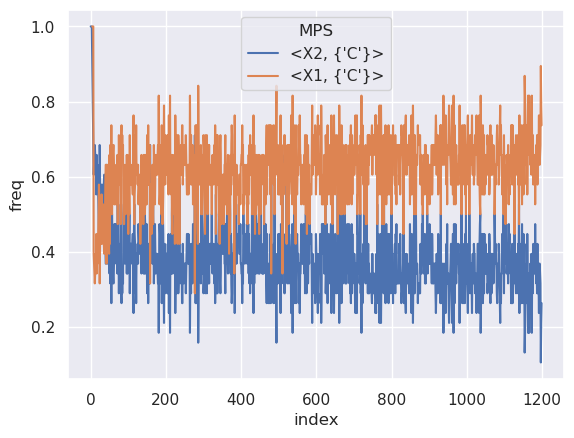

In [24]:
sns.lineplot(data=pomps_freq, x='index', y='freq', hue='MPS')

<AxesSubplot:xlabel='index', ylabel='Y'>

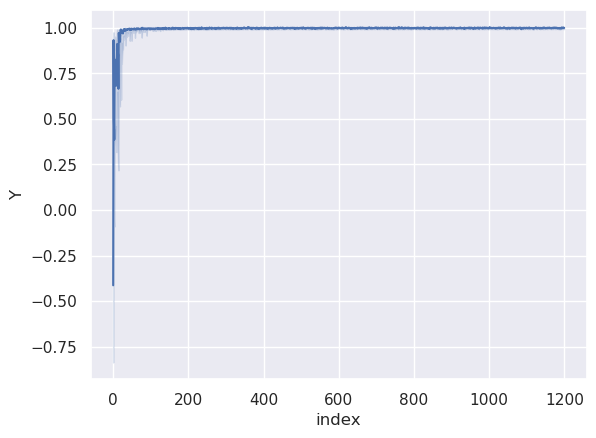

In [25]:
sns.lineplot(data=combinded_df, x='index', y='Y', estimator="median", errorbar=("pi", 50))

<AxesSubplot:xlabel='index', ylabel='Regret'>

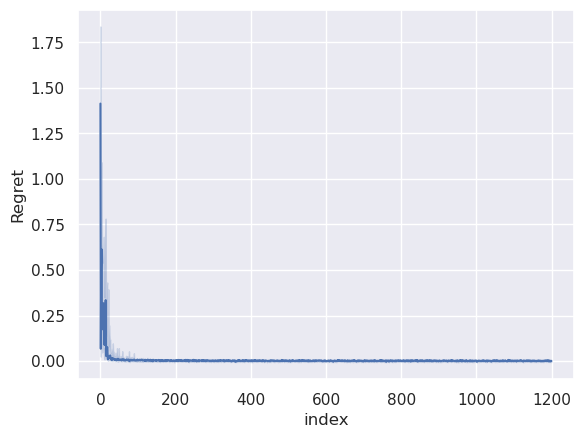

In [27]:
sns.lineplot(data=combinded_df, x='index', y='Regret', estimator="median", errorbar=("pi", 50))

<AxesSubplot:xlabel='index', ylabel='Cum_Regret'>

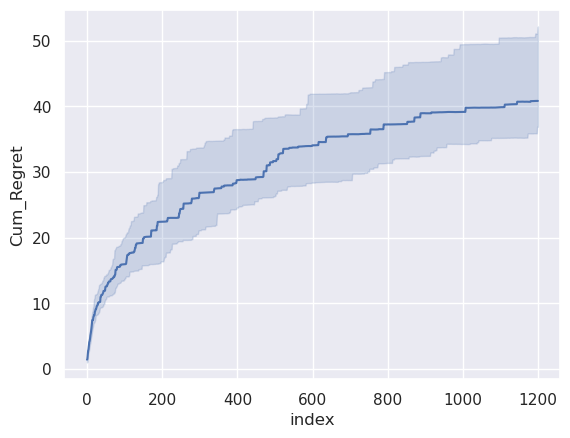

In [29]:
# TODO: Is this the best way to show cumulative regret?
sns.lineplot(data=combinded_df, x='index', y='Cum_Regret', estimator="median", errorbar=("pi", 50))